In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

### Merging 12 CSV files into 1 file

In [2]:
# sales_data = glob.glob('Sales*')

#Using glob to find all file name that has Sales in it

In [141]:
sales_all = pd.read_csv('Sales_all.csv')
sales_all.head()

# using concatenate to merge all 12 csv files into 1 file

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning Process
- dropping all the null values in the columns so it would not disturb our analysis process
- Converting column types 


In [142]:
sales_all.info()

## all of the columns has object types 
# we will need to convert some of the columns into int/float, and datetime format for our analysis 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [143]:
sales_all.columns = ['order_id','product', 'quantity_ordered', 'price_each', 'order_date', 'purchase_address']
sales_all.head()

## renaming all the columns just because my personal preference of using snake casing 

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [144]:
sales_all.drop(sales_all[sales_all.price_each == 'Price Each'].index, inplace = True)

## there are some of the rows in price_each columns has 'Price each' as their price instead of a digit so we're going to drop those 

In [145]:
sales_all['price_each'] = sales_all['price_each'].astype('float') 

# price each columns change into float type 

In [146]:
sales_all['order_date'] = pd.to_datetime(sales_all['order_date'])

In [149]:
sales_all['quantity_ordered'] = sales_all['quantity_ordered'].astype('int') 


In [148]:
sales_all.dropna(inplace = True)
sales_all.reset_index(drop=True, inplace=True)


In [150]:
sales_all.info()

# checking to make sure that our data has succesfully converted to the types that we wanted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int32         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 7.8+ MB


In [151]:
sales_all.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Preparation 

<b> Feature Engineering </b>

- Adding necessary columns that will help our analysis process



In [152]:
sales_all['month'] = sales_all['order_date'].dt.strftime('%B')
sales_all['months'] = sales_all['order_date'].dt.strftime('%m')

#adding month columns 

In [153]:
sales_all['total'] = sales_all['quantity_ordered'] * sales_all['price_each']
sales_all.head()
# adding total column by multiplying quantity ordered with price each

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,months,total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,04,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,04,11.99


<b> Add City Column</b>

In [154]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_all['city'] = sales_all['purchase_address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
sales_all.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,months,total,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,04,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,04,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,04,11.99,Los Angeles CA


## Exploratory Data Analysis

###  Finding the best month dot sales and how much was earned 

In [155]:
result = sales_all.groupby('months').sum()
result.sort_values('total', ascending = False)

## December is the month with the highest total sales
## January is the worst performing month for the electronic store 
## total sales of december somewhere around 13.8 million

,quantity_ordered,price_each,total
months,,,
12,28114,4.588415e+06,4.613443e+06
10,22703,3.715555e+06,3.736727e+06
04,20558,3.367671e+06,3.390670e+06
11,19798,3.180601e+06,3.199603e+06
05,18667,3.135125e+06,3.152607e+06
03,17005,2.791208e+06,2.807100e+06
07,16072,2.632540e+06,2.647776e+06
06,15253,2.562026e+06,2.577802e+06
08,13448,2.230345e+06,2.244468e+06


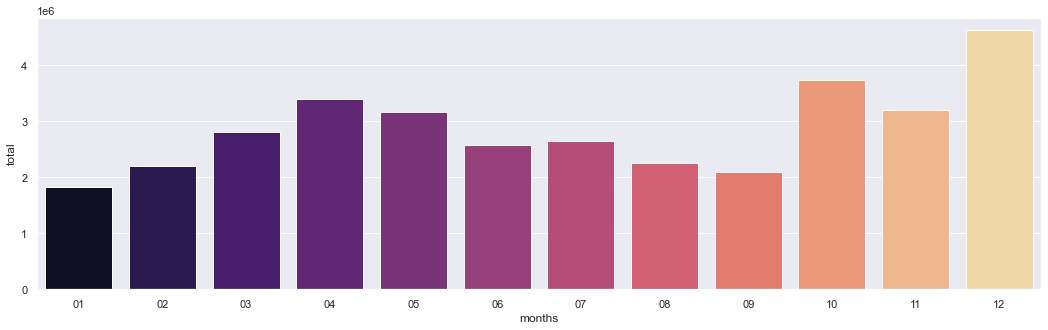

In [202]:
plt.figure(figsize = (18 , 5))
sns.barplot(x = result.index, y = result['total'], palette = 'magma')

### What city has the highest number sales

In [157]:
city_results = sales_all.groupby('city').sum()
city_results.sort_values('total', ascending = False)

# San Fransisco California has the highest sales among all city 
# While Portland Maine has the lowest number of sales 

,quantity_ordered,price_each,total
city,,,
San Francisco CA,50239,8.211462e+06,8.262204e+06
Los Angeles CA,33289,5.421435e+06,5.452571e+06
New York City NY,27932,4.635371e+06,4.664317e+06
Boston MA,22528,3.637410e+06,3.661642e+06
Atlanta GA,16602,2.779908e+06,2.795499e+06
Dallas TX,16730,2.752628e+06,2.767975e+06
Seattle WA,16553,2.733296e+06,2.747755e+06
Portland OR,11303,1.860558e+06,1.870732e+06
Austin TX,11153,1.809874e+06,1.819582e+06


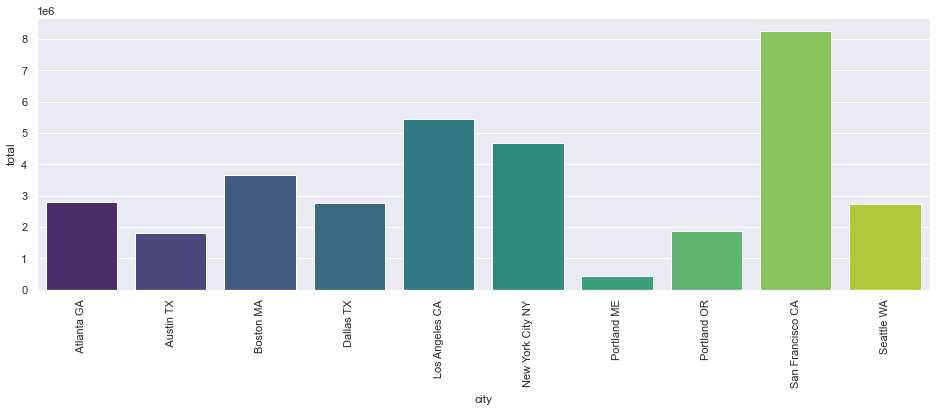

In [200]:
plt.figure(figsize = (16, 5))
sns.barplot(x = city_results.index, y= city_results['total'], palette = 'viridis' )
plt.xticks(rotation = 90)
plt.show()

### When is the best time to display advertisement

In [159]:
sales_all['day'] = sales_all['order_date'].dt.day_name()
sales_all['hour'] = sales_all['order_date'].dt.hour
sales_all['minute'] = sales_all['order_date'].dt.minute

sales_all.head()

# Adding day name so it can be analyze later on 
# and adding hour and minute to know when to display the best advertisement

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,months,total,city,day,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,04,23.90,Dallas TX,Friday,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,04,99.99,Boston MA,Sunday,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,600.00,Los Angeles CA,Friday,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,04,11.99,Los Angeles CA,Friday,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,04,11.99,Los Angeles CA,Tuesday,9,27


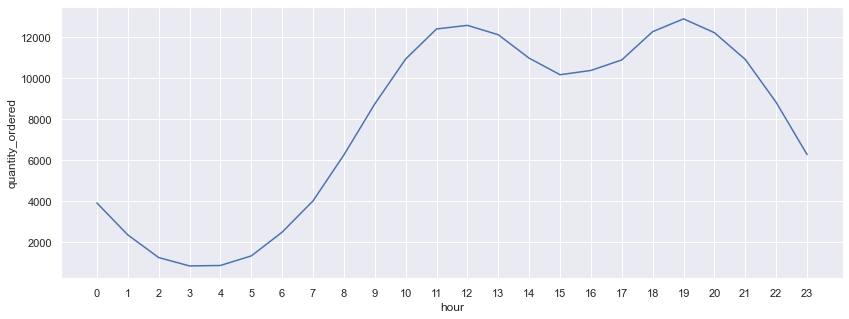

In [196]:
time_group = sales_all.groupby('hour').count()

plt.figure(figsize = (14, 5))
sns.set(style = 'darkgrid')
sns.lineplot(x =time_group.index, y = time_group['quantity_ordered'])
plt.xticks(time_group.index)
plt.show()

# from this graph down here the highest number of product sold were during this 11am - 12pm and 7pm period
# so from my analysis the best time to display advertisments is during 8am to 11am since that's the morning peak for number of transaction
# while during the evening the best time to display advertisement is at 5pm to 7pm
# any advertisements after 7pm is not recommended because of the number of transaction stedily going down

### What Product does sell the most

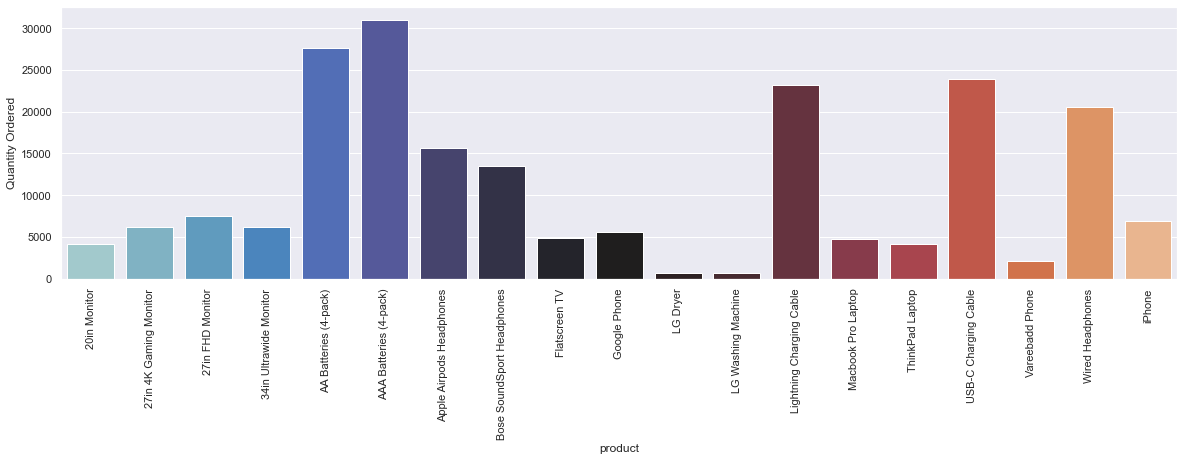

In [179]:
product_sales =  sales_all.groupby('product').sum()
quantity_ordered = product_sales.sum()['quantity_ordered']
product_sales.sort_values('quantity_ordered', ascending = False)

plt.figure(figsize = (20,5))
sns.barplot(x = product_sales.index, y =product_sales['quantity_ordered'], palette = 'icefire')
plt.xticks(rotation = 90)
plt.ylabel('Quantity Ordered')
plt.show()

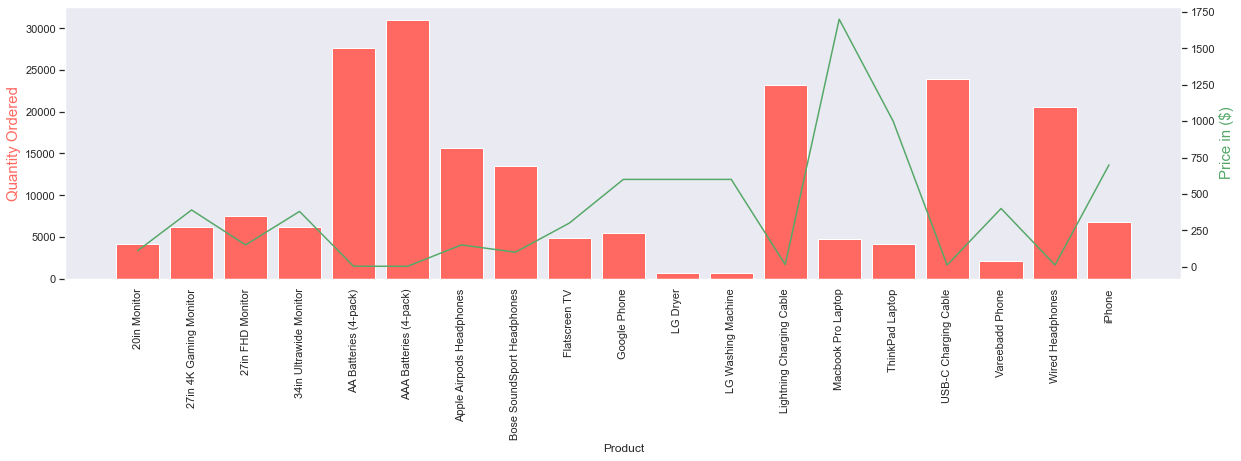

In [210]:
prices = sales_all.groupby('product').mean()
sns.set(style = 'dark')

fig, ax1 = plt.subplots(figsize = (20,5))
ax2 = ax1.twinx()

ax1.bar(product_sales.index, product_sales['quantity_ordered'], color = '#ff6961')
ax2.plot(product_sales.index, prices['price_each'], 'g-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = '#ff6961', size = 15)
ax2.set_ylabel('Price in ($)', color = 'g', size = '15')
ax1.set_xticklabels(product_sales.index,rotation = 90)
plt.show()

# product with lower prices has more quantity ordered compared with product with high prices 
# personal electornic product (phone / laptop ) with higher prices tend to sell better compared to house appliance electronic
